In [1]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 15000) #important for getting all the text
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import time
import re
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

In [2]:
cd C:\\Users\\ak055384\\Documents

C:\Users\ak055384\Documents


In [3]:
claims = pd.read_csv("DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv", sep=",", encoding = 'utf8')
claims.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831.0,20090902.0,3900HM,5000.0,0.0,6.119985e+08,6.119985e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000.0,0.0,4.971603e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000.0,0.0,6.408400e+09,1.960860e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
claims.shape

(66773, 81)

In [5]:
# 2008 demographics data matches all 'DESYNPUF_ID' in claims sample 1.
summary1 = pd.read_csv("DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv", sep=",", encoding = 'utf8')
summary2 = pd.read_csv("DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv", sep=",", encoding = 'utf8')
summary3 = pd.read_csv("DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv", sep=",", encoding = 'utf8')
summary = summary1.append(summary2).append(summary3)
summary.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,...,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0


In [7]:
print(summary.columns)

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR'],
      dtype='object')


In [6]:
len(claims['CLM_ID'].unique())

66705

In [7]:
claims['CLM_PMT_AMT'].describe()

count    66773.000000
mean      9573.632756
std       9315.073232
min      -8000.000000
25%       4000.000000
50%       7000.000000
75%      11000.000000
max      57000.000000
Name: CLM_PMT_AMT, dtype: float64

### A unique cryptographic identifier, DESYNPUF_ID, identifying beneficiaries was provided in each CMS linkable 2008-2010 Medicare DE-SynPUF. DE-SynPUF users can link CMS Linkable 2008-2010 Medicare DE-SynPUFs using this Beneficiary Code, DESYNPUF_ID, as the linking key. However, DESYNPUF_ID was specifically created for DE-SynPUFs and carries no information about the patient or any patient records, and is provided solely for reference and data processing purposes.

In [9]:
len(claims['DESYNPUF_ID'].unique())

37780

In [10]:
claims[claims['DESYNPUF_ID'] == '00016F745862898F']

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831.0,20090902.0,3900HM,5000.0,0.0,6.119985e+08,6.119985e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000.0,0.0,4.971603e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000.0,0.0,6.408400e+09,1.960860e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#https://pandas.pydata.org/pandas-docs/stable/merging.html
claimsSummary = pd.merge(claims, summary, how='inner', on='DESYNPUF_ID')
claimsSummary.head(5)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,...,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,...,2,0.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0
2,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,...,2,4000.0,1100.0,0.0,0.0,0.0,0.0,90.0,30.0,0.0
3,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,...,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
4,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,...,1,36000.0,3204.0,0.0,60.0,70.0,0.0,1350.0,530.0,100.0


In [12]:
claimsSummary.shape

(199314, 112)

In [13]:
drg = pd.read_csv("Drg.csv", sep=",", encoding = 'utf8')
drg['CLM_DRG_CD'] = drg['CLM_DRG_CD'].astype(str)
drg.head(5)

,CLM_DRG_CD,MDC,Description,Type
0,1,PRE-MDC,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,Surgical
1,2,PRE-MDC,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W/O MCC,Surgical
2,3,PRE-MDC,"ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.",Surgical
3,4,PRE-MDC,"TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.",Surgical
4,5,PRE-MDC,LIVER TRANSPLANT W MCC OR INTESTINAL TRANSPLANT,Surgical


In [15]:
joinClaims = pd.merge(claimsSummary, drg, how='left', on='CLM_DRG_CD')
joinClaims.shape

(199314, 115)

In [111]:
#train_df_c = pd.read_pickle("train.pkl.compress", compression="gzip")

### Text Mining and Kmeans clustering to encode diagnosis and procedure codes.

In [15]:
diag = pd.read_csv("diag_codes.csv", sep=",", encoding = 'utf8')
diag = diag.dropna()
diag.head(20)

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION,CODE
9,10,Cholera due to vibrio cholerae,Cholera d/t vib cholerae,10
10,11,Cholera due to vibrio cholerae el tor,Cholera d/t vib el tor,11
11,19,"Cholera, unspecified",Cholera NOS,19
12,20,Typhoid fever,Typhoid fever,20
13,21,Paratyphoid fever A,Paratyphoid fever a,21
14,22,Paratyphoid fever B,Paratyphoid fever b,22
15,23,Paratyphoid fever C,Paratyphoid fever c,23
16,29,"Paratyphoid fever, unspecified",Paratyphoid fever NOS,29
17,30,Salmonella gastroenteritis,Salmonella enteritis,30
18,31,Salmonella septicemia,Salmonella septicemia,31


In [16]:
proc = pd.read_csv("proc_codes.csv", sep=",", encoding = 'utf8')
proc = proc.dropna()
proc.head(20)

,PROCEDURE CODE,LONG DESCRIPTION,SHORT DESCRIPTION,CODE,CODE1
0,1,Therapeutic ultrasound of vessels of head and neck,Ther ult head & neck ves,1,5
1,2,Therapeutic ultrasound of heart,Ther ultrasound of heart,2,20
2,3,Therapeutic ultrasound of peripheral vascular vessels,Ther ult peripheral ves,3,30
3,9,Other therapeutic ultrasound,Other therapeutic ultsnd,9,90
4,10,Implantation of chemotherapeutic agent,Implant chemothera agent,10,100
5,11,Infusion of drotrecogin alfa (activated),Infus drotrecogin alfa,11,110
6,12,Administration of inhaled nitric oxide,Adm inhal nitric oxide,12,120
7,13,Injection or infusion of nesiritide,Inject/infus nesiritide,13,130
8,14,Injection or infusion of oxazolidinone class of antibiotics,Injection oxazolidinone,14,140
9,15,High-dose infusion interleukin-2 [IL-2],High-dose infusion IL-2,15,150


In [24]:
skl_stopwords = text.ENGLISH_STOP_WORDS
myStopwords = set(skl_stopwords)
print(myStopwords)

{'becomes', 'we', 'describe', 'sincere', 'nevertheless', 'what', 'herein', 'often', 'once', 'too', 'throughout', 'whereby', 'there', 'inc', 're', 'now', 'find', 'without', 'ever', 'itself', 'although', 'whereas', 'seemed', 'are', 'up', 'much', 'most', 'becoming', 'you', 'everyone', 'before', 'nothing', 'whether', 'but', 'behind', 'your', 'full', 'thick', 'only', 'do', 'might', 'him', 'why', 'seem', 'fifteen', 'until', 'ten', 'since', 'more', 'therefore', 'top', 'yours', 'whose', 'each', 'fifty', 'me', 'call', 'never', 'beside', 'then', 'no', 'con', 'un', 'least', 'down', 'always', 'get', 'though', 'also', 'de', 'should', 'interest', 'toward', 'anyone', 'therein', 'that', 'go', 'while', 'a', 'during', 'mine', 'four', 'anyhow', 'and', 'formerly', 'myself', 'whatever', 'amount', 'afterwards', 'own', 'hasnt', 'off', 'in', 'again', 'nine', 'over', 'can', 'within', 'further', 'herself', 'eight', 'or', 'not', 'nowhere', 'cannot', 'meanwhile', 'around', 'show', 'something', 'latterly', 'whole'

In [19]:
ps = PorterStemmer() #define method (http://www.nltk.org/api/nltk.stem.html#nltk.stem.porter.PorterStemmer)
proc['LONG DESCRIPTION'] = [ps.stem(word) for word in proc['LONG DESCRIPTION']] 

In [21]:
proc.head(20)

,PROCEDURE CODE,LONG DESCRIPTION,SHORT DESCRIPTION,CODE,CODE1
0,1,therapeutic ultrasound of vessels of head and neck,Ther ult head & neck ves,1,5
1,2,therapeutic ultrasound of heart,Ther ultrasound of heart,2,20
2,3,therapeutic ultrasound of peripheral vascular vessel,Ther ult peripheral ves,3,30
3,9,other therapeutic ultrasound,Other therapeutic ultsnd,9,90
4,10,implantation of chemotherapeutic ag,Implant chemothera agent,10,100
5,11,infusion of drotrecogin alfa (activated),Infus drotrecogin alfa,11,110
6,12,administration of inhaled nitric oxid,Adm inhal nitric oxide,12,120
7,13,injection or infusion of nesiritid,Inject/infus nesiritide,13,130
8,14,injection or infusion of oxazolidinone class of antibiot,Injection oxazolidinone,14,140
9,15,high-dose infusion interleukin-2 [il-2],High-dose infusion IL-2,15,150


In [20]:
diag['LONG DESCRIPTION'] = [ps.stem(word) for word in diag['LONG DESCRIPTION']] 

In [22]:
diag.head(20)

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION,CODE
9,10,cholera due to vibrio cholera,Cholera d/t vib cholerae,10
10,11,cholera due to vibrio cholerae el tor,Cholera d/t vib el tor,11
11,19,"cholera, unspecifi",Cholera NOS,19
12,20,typhoid fev,Typhoid fever,20
13,21,paratyphoid fever a,Paratyphoid fever a,21
14,22,paratyphoid fever b,Paratyphoid fever b,22
15,23,paratyphoid fever c,Paratyphoid fever c,23
16,29,"paratyphoid fever, unspecifi",Paratyphoid fever NOS,29
17,30,salmonella gastroenter,Salmonella enteritis,30
18,31,salmonella septicemia,Salmonella septicemia,31


In [35]:
tfidf = TfidfVectorizer(lowercase = True, 
                        stop_words= skl_stopwords, 
                        max_df=0.95, 
                        min_df=0.001,
                        ngram_range = (1,3))

In [ ]:
tfidf_dm1 = tfidf.fit_transform(proc['LONG DESCRIPTION'])

# print matrix shape(s)
print(tfidf_dm1.shape)
names = tfidf.get_feature_names()
print(type(names), len(names))

In [ ]:
count = np.sum(tfidf_dm1.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(20)

In [94]:
tfidf_dm2 = tfidf.fit_transform(proc['SHORT DESCRIPTION'])

# print matrix shape(s)
print(tfidf_dm2.shape)
names = tfidf.get_feature_names()
print(type(names), len(names))

(3882, 128)
<class 'list'> 128


In [95]:
count = np.sum(tfidf_dm2.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(20)

<class 'list'> 128


,count
nec,377.640912
nos,128.013126
repair,106.065441
biopsy,89.119472
les,70.538142
oth,64.508603
incision,57.663236
op,53.859459
remov,53.588426
suture,53.027901


In [170]:
tfidf_dm3 = tfidf.fit_transform(diag['LONG DESCRIPTION'])

# print matrix shape(s)
print(tfidf_dm3.shape)
names = tfidf.get_feature_names()
print(type(names), len(names))

(14567, 318)
<class 'list'> 318


In [171]:
count = np.sum(tfidf_dm3.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(20)

<class 'list'> 318


,count
unspecified,731.221376
unspecifi,584.397850
specified,416.213805
mention,348.383298
injury,320.627723
open,271.706812
neoplasm,263.277492
poisoning,258.152207
malignant,242.675164
acute,240.162586


In [172]:
tfidf_dm4 = tfidf.fit_transform(diag['SHORT DESCRIPTION'])

# print matrix shape(s)
print(tfidf_dm4.shape)
names = tfidf.get_feature_names()
print(type(names), len(names))

(14567, 104)
<class 'list'> 104


In [50]:
count = np.sum(tfidf_dm4.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(20)

<class 'list'> 104


,count
nos,1373.226212
nec,1348.463680
dis,415.808982
fx,327.703613
oth,310.818222
neo,242.876661
tb,241.280881
acc,239.080959
open,220.506522
unspec,218.667121


#### Diagnoses long description text mining auto encoding

In [52]:
tfidf_dm3.shape

(14567, 104)

In [196]:
pd.DataFrame(tfidf_dm3.toarray()).to_csv("diag_document_matrix.csv", sep=',', encoding='utf-8')

In [80]:
cluster_range = [100,120,150,170,180,200,220,230,250,270,290,300,350,400,500,600,700,900,1000]
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(tfidf_dm3.toarray())
  cluster_errors.append(clusters.inertia_)

In [81]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

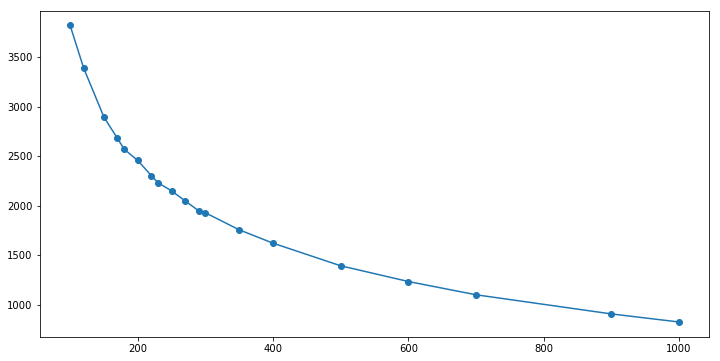

In [82]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [173]:
k_means_set = [KMeans(n_clusters=k,init='k-means++').fit(tfidf_dm3) for k in cluster_range]
centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]

In [175]:
# calc euclidean dist from each point to each cluster center
from scipy.spatial.distance import cdist, pdist
dm_array = tfidf_dm3.toarray()

k_euclid = [cdist(dm_array, thing, 'euclidean') for thing in centroids_list]
distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

# total within-cluster sum of squares
wcss = [np.sum(distance**2) for distance in distance_set]

# total sum of squares
tss  = np.sum(pdist(dm_array)**2) / dm_array.shape[0]

# between cluster sum of squares
bss = tss - wcss

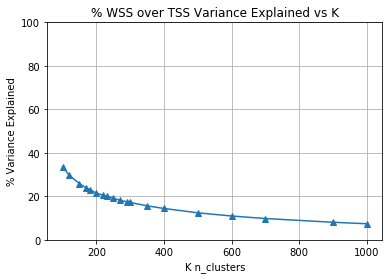

In [177]:
# plot elbow chart wss/tss
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(cluster_range, wcss/tss*100, '^-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('K n_clusters')
plt.ylabel('% Variance Explained')
plt.title('% WSS over TSS Variance Explained vs K')

In [190]:
kmeans = KMeans(n_clusters=300)
clusters = kmeans.fit(tfidf_dm3)

In [191]:
diag['cluster'] = pd.Series(clusters.labels_, index=diag.index)

In [192]:
diag.to_csv("diag_cluster.csv", sep=',', encoding='utf-8')

In [203]:
diag[['DIAGNOSIS CODE', 'LONG DESCRIPTION','SHORT DESCRIPTION','cluster']].head(10)

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION,cluster
9,10,cholera due to vibrio cholera,Cholera d/t vib cholerae,2
10,11,cholera due to vibrio cholerae el tor,Cholera d/t vib el tor,2
11,19,"cholera, unspecifi",Cholera NOS,1
12,20,typhoid fev,Typhoid fever,2
13,21,paratyphoid fever a,Paratyphoid fever a,2
14,22,paratyphoid fever b,Paratyphoid fever b,2
15,23,paratyphoid fever c,Paratyphoid fever c,2
16,29,"paratyphoid fever, unspecifi",Paratyphoid fever NOS,1
17,30,salmonella gastroenter,Salmonella enteritis,2
18,31,salmonella septicemia,Salmonella septicemia,2


#### Prodcedures long description text mining auto encoding

In [96]:
cluster_range = [100,120,150,170,180,200,220,230,250,270,290,300,350,400,500,600,700,900,1000]
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(tfidf_dm1.toarray())
  cluster_errors.append(clusters.inertia_)

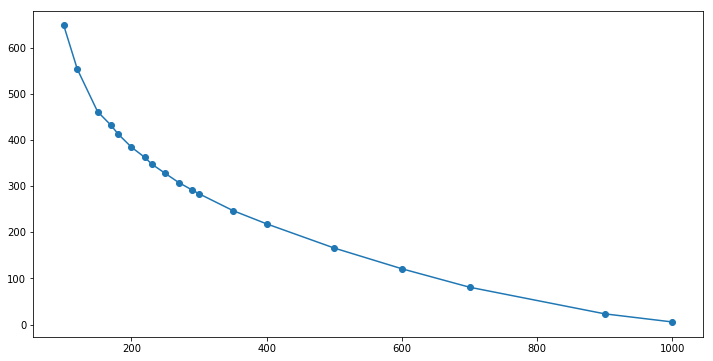

In [97]:
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors})
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [178]:
k_means_set = [KMeans(n_clusters=k,init='k-means++').fit(tfidf_dm1) for k in cluster_range]
centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]

In [179]:
# calc euclidean dist from each point to each cluster center
from scipy.spatial.distance import cdist, pdist
dm_array = tfidf_dm1.toarray()

k_euclid = [cdist(dm_array, thing, 'euclidean') for thing in centroids_list]
distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

# total within-cluster sum of squares
wcss = [np.sum(distance**2) for distance in distance_set]

# total sum of squares
tss  = np.sum(pdist(dm_array)**2) / dm_array.shape[0]

# between cluster sum of squares
bss = tss - wcss

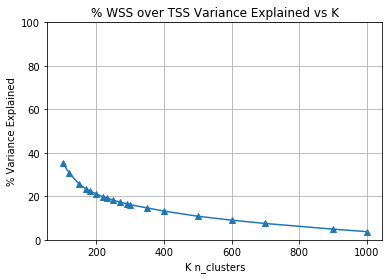

In [180]:
# plot elbow chart wss/tss
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(cluster_range, wcss/tss*100, '^-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('K n_clusters')
plt.ylabel('% Variance Explained')
plt.title('% WSS over TSS Variance Explained vs K')

In [99]:
kmeans = KMeans(n_clusters=300)
clusters = kmeans.fit(tfidf_dm1.toarray())
y_kmeans = kmeans.predict(X)

In [100]:
proc['cluster'] = pd.Series(clusters.labels_, index=proc.index)

In [101]:
proc.to_csv("proc_cluster.csv", sep=',', encoding='utf-8')

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Supervised Learning Techniques

In [16]:
joinClaims = joinClaims[joinClaims['MDC'].notnull()]
joinClaims.head(10)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,MDC,Description,Type
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,...,0.0,50.0,10.0,0.0,0.0,0.0,0.0,MDC-05,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W CARD CATH W CC,Surgical
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,...,0.0,0.0,0.0,0.0,700.0,240.0,0.0,MDC-04,PNEUMOTHORAX W/O CC/MCC,Medical
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000.0,0.0,4.971603e+09,NaN,...,0.0,0.0,0.0,0.0,700.0,240.0,0.0,MDC-19,DISORDERS OF PERSONALITY & IMPULSE CONTROL,Medical
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000.0,0.0,6.408400e+09,1.960860e+09,...,0.0,0.0,0.0,0.0,700.0,240.0,0.0,UNGROUPABLE,EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W/O CC/MCC,Surgical
5,00052705243EA128,196991176971757,1,20080912.0,20080912.0,1401HG,14000.0,0.0,6.132011e+09,NaN,...,0.0,4240.0,3130.0,0.0,6740.0,2130.0,1200.0,MDC-04,PNEUMOTHORAX W/O CC/MCC,Medical
6,0007F12A492FD25D,196661176963773,1,20080919.0,20080922.0,3400WD,5000.0,0.0,8.956736e+09,6.551008e+09,...,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,MDC-23,OTHER FACTORS INFLUENCING HEALTH STATUS,Medical
7,0007F12A492FD25D,196821177025734,1,20100602.0,20100606.0,34S0KQ,5000.0,0.0,5.838959e+09,NaN,...,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,MDC-04,OTHER RESPIRATORY SYSTEM DIAGNOSES W MCC,Medical
8,0007F12A492FD25D,196551177025145,1,20100522.0,20100612.0,3400WD,14000.0,0.0,1.907447e+09,NaN,...,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,MDC-23,AFTERCARE W/O CC/MCC,Medical
9,0007F12A492FD25D,196831176966961,1,20100616.0,20100619.0,3401ZP,29000.0,0.0,4.959466e+09,8.002609e+09,...,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,MDC-08,SPINAL FUS EXC CERV W SPINAL CURV/MALIG/INFEC OR EXT FUS W MCC,Surgical
10,000B97BA2314E971,196231176958277,1,20091209.0,20091213.0,2200GD,2000.0,0.0,3.115083e+09,NaN,...,0.0,0.0,0.0,0.0,1020.0,290.0,0.0,MDC-05,AMPUTATION FOR CIRC SYS DISORDERS EXC UPPER LIMB & TOE W/O CC/MCC,Surgical


In [17]:
joinClaims.shape

(59642, 115)

In [21]:
# designate target variable name
targetName = 'MDC'
targetSeries = joinClaims[targetName]
#remove target from current location and insert in collum 0
del joinClaims[targetName]
joinClaims.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
joinClaims.head(10)

,MDC,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,...,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,Description,Type
0,MDC-05,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,...,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W CARD CATH W CC,Surgical
1,MDC-04,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,...,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,PNEUMOTHORAX W/O CC/MCC,Medical
3,MDC-19,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000.0,0.0,4.971603e+09,...,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,DISORDERS OF PERSONALITY & IMPULSE CONTROL,Medical
4,UNGROUPABLE,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000.0,0.0,6.408400e+09,...,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W/O CC/MCC,Surgical
5,MDC-04,00052705243EA128,196991176971757,1,20080912.0,20080912.0,1401HG,14000.0,0.0,6.132011e+09,...,1024.0,0.0,4240.0,3130.0,0.0,6740.0,2130.0,1200.0,PNEUMOTHORAX W/O CC/MCC,Medical
6,MDC-23,0007F12A492FD25D,196661176963773,1,20080919.0,20080922.0,3400WD,5000.0,0.0,8.956736e+09,...,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,OTHER FACTORS INFLUENCING HEALTH STATUS,Medical
7,MDC-04,0007F12A492FD25D,196821177025734,1,20100602.0,20100606.0,34S0KQ,5000.0,0.0,5.838959e+09,...,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,OTHER RESPIRATORY SYSTEM DIAGNOSES W MCC,Medical
8,MDC-23,0007F12A492FD25D,196551177025145,1,20100522.0,20100612.0,3400WD,14000.0,0.0,1.907447e+09,...,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,AFTERCARE W/O CC/MCC,Medical
9,MDC-08,0007F12A492FD25D,196831176966961,1,20100616.0,20100619.0,3401ZP,29000.0,0.0,4.959466e+09,...,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,SPINAL FUS EXC CERV W SPINAL CURV/MALIG/INFEC OR EXT FUS W MCC,Surgical
10,MDC-05,000B97BA2314E971,196231176958277,1,20091209.0,20091213.0,2200GD,2000.0,0.0,3.115083e+09,...,0.0,0.0,0.0,0.0,0.0,1020.0,290.0,0.0,AMPUTATION FOR CIRC SYS DISORDERS EXC UPPER LIMB & TOE W/O CC/MCC,Surgical


In [18]:
dtype_df = joinClaims.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,24
1,float64,68
2,object,23


In [19]:
vars_with_missing = []
for attName in joinClaims.columns:
    missings = joinClaims[joinClaims[attName] == 0][attName].count()
    if missings > 0:
        vars_with_missing.append(attName)
        missings_perc = missings/joinClaims.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values'.format(attName, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable CLM_PMT_AMT has 1558 records (2.61%) with missing values
Variable NCH_PRMRY_PYR_CLM_PD_AMT has 58295 records (97.74%) with missing values
Variable CLM_PASS_THRU_PER_DIEM_AMT has 42880 records (71.90%) with missing values
Variable NCH_BENE_PTA_COINSRNC_LBLTY_AM has 58349 records (97.83%) with missing values
Variable NCH_BENE_BLOOD_DDCTBL_LBLTY_AM has 59481 records (99.73%) with missing values
Variable CLM_UTLZTN_DAY_CNT has 2008 records (3.37%) with missing values
Variable BENE_COUNTY_CD has 1175 records (1.97%) with missing values
Variable BENE_HI_CVRAGE_TOT_MONS has 1261 records (2.11%) with missing values
Variable BENE_SMI_CVRAGE_TOT_MONS has 1683 records (2.82%) with missing values
Variable BENE_HMO_CVRAGE_TOT_MONS has 45379 records (76.09%) with missing values
Variable PLAN_CVRG_MOS_NUM has 20968 records (35.16%) with missing values
Variable MEDREIMB_IP has 25289 records (42.40%) with missing values
Variable BENRES_IP has 24888 records (41.73%) with missing values
Variable

In [22]:
uniqueDrgs = joinClaims[targetName].unique()
len(uniqueDrgs)

25

In [21]:
joinClaims.groupby(targetName)['CLM_ID'].aggregate(len)

MDC
MDC-01           246
MDC-02            67
MDC-03           493
MDC-04          9407
MDC-05         14365
MDC-06          6681
MDC-07          1726
MDC-08          7568
MDC-09          1571
MDC-10          2400
MDC-11          2282
MDC-12          1853
MDC-13           390
MDC-14            72
MDC-16           874
MDC-17           430
MDC-18          3063
MDC-19          2323
MDC-20           411
MDC-21           759
MDC-22            22
MDC-23          2267
MDC-24            80
MDC-25            65
UNGROUPABLE      227
Name: CLM_ID, dtype: int64

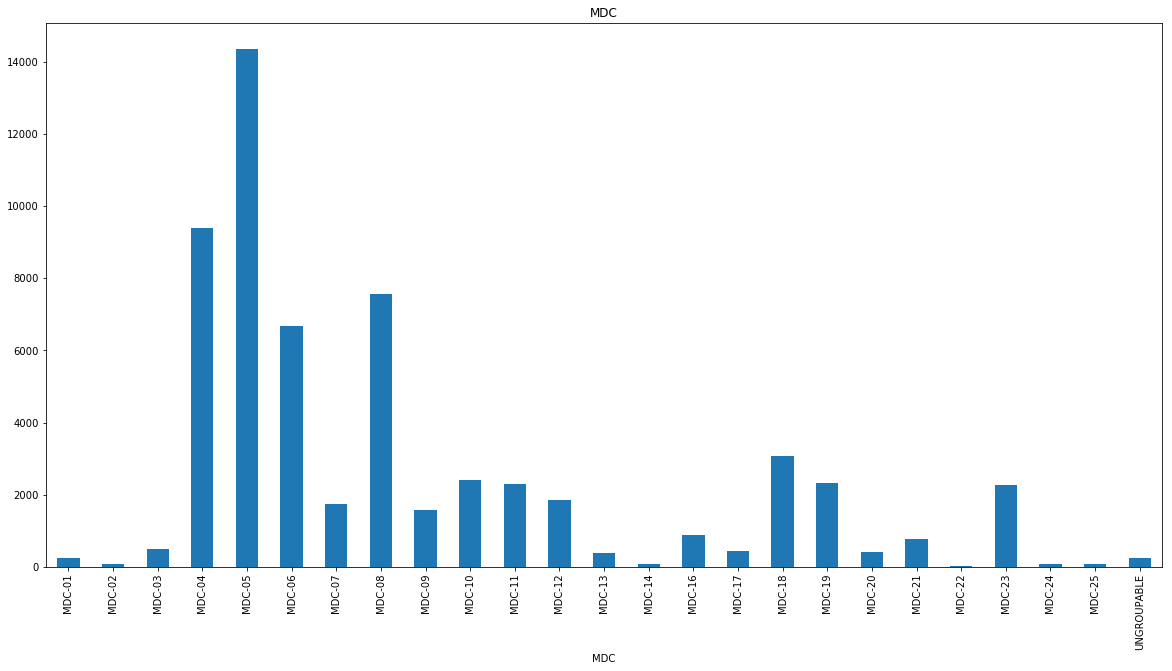

In [22]:
#claims.groupby(targetName)['CLM_ID'].nunique()
claimsAgg = joinClaims.groupby(targetName)['CLM_ID'].aggregate(len)
claimsAgg.plot(kind='bar', grid=False, figsize=(20,10)).set_title('MDC')

In [26]:
interestingColumns = ['MDC', 'ADMTNG_ICD9_DGNS_CD','ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2',
       'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4', 'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6',
       'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8', 'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10',
       'ICD9_PRCDR_CD_1', 'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3',
       'ICD9_PRCDR_CD_4', 'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_BIRTH_DT']
dgnColumns = ['ADMTNG_ICD9_DGNS_CD', 'ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2',
       'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4', 'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6',
       'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8', 'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10']
prcdrColumns = [ 'ICD9_PRCDR_CD_1', 'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3',
       'ICD9_PRCDR_CD_4', 'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6']
demoColumns = ['BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_BIRTH_DT']

In [27]:
for col in interestingColumns:
    print('Column {} data type {} has {} unique values'.format(col, joinClaims[col].dtype, len(joinClaims[col].unique())))

Column MDC data type object has 25 unique values
Column ADMTNG_ICD9_DGNS_CD data type object has 2076 unique values
Column ICD9_DGNS_CD_1 data type object has 2414 unique values
Column ICD9_DGNS_CD_2 data type object has 2806 unique values
Column ICD9_DGNS_CD_3 data type object has 2784 unique values
Column ICD9_DGNS_CD_4 data type object has 2757 unique values
Column ICD9_DGNS_CD_5 data type object has 2770 unique values
Column ICD9_DGNS_CD_6 data type object has 2721 unique values
Column ICD9_DGNS_CD_7 data type object has 2681 unique values
Column ICD9_DGNS_CD_8 data type object has 2561 unique values
Column ICD9_DGNS_CD_9 data type object has 2442 unique values
Column ICD9_DGNS_CD_10 data type object has 1057 unique values
Column ICD9_PRCDR_CD_1 data type float64 has 1181 unique values
Column ICD9_PRCDR_CD_2 data type object has 1837 unique values
Column ICD9_PRCDR_CD_3 data type object has 1551 unique values
Column ICD9_PRCDR_CD_4 data type object has 1248 unique values
Column ICD

In [28]:
claims_subset_df = joinClaims[dgnColumns + prcdrColumns]
claims_subset_df.shape

(59642, 17)

In [29]:
claims_subset_df2 = joinClaims[demoColumns]
claims_subset_df2.shape

(59642, 3)

In [30]:
combineClaims_subset = pd.concat([claims_subset_df, claims_subset_df2], axis=1)
combineClaims_subset.shape

(59642, 20)

#### Too many dummy variables (33553) created.  

In [28]:
claims_features_df = pd.get_dummies(pd.DataFrame(claims_subset_df.values.tolist()), prefix_sep='', prefix='')
len(claims_features_df.columns.values)

33553

#### Example creating dummy variables and combine same codes.  
We need to reduce number of dummy variables created for ICD9_DGNS_CD_1, ICD9_DGNS_CD_2, ICD9_DGNS_CD_3...etc.

In [50]:
data = {'ICD9_DGNS_CD_1':['7802', '7803', '7804'],'ICD9_DGNS_CD_2':['7803','7804','7805'],'ICD9_DGNS_CD_3':['7803','7802','7801']}
df = pd.DataFrame(data, index=['1','2','3'])

In [51]:
df

,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3
1,7802,7803,7803
2,7803,7804,7802
3,7804,7805,7801


In [52]:
test1 = pd.get_dummies(df['ICD9_DGNS_CD_1'], prefix_sep='', prefix='')
test1

,7802,7803,7804
1,1,0,0
2,0,1,0
3,0,0,1


In [53]:
test2 = pd.get_dummies(df['ICD9_DGNS_CD_2'], prefix_sep='', prefix='')
test2

,7803,7804,7805
1,1,0,0
2,0,1,0
3,0,0,1


In [54]:
test3 = pd.get_dummies(df['ICD9_DGNS_CD_3'], prefix_sep='', prefix='')
test3

,7801,7802,7803
1,0,0,1
2,0,1,0
3,1,0,0


In [55]:
c = test1.append(test2)
c = c.fillna(0.0)
c

,7802,7803,7804,7805
1,1.0,0,0,0.0
2,0.0,1,0,0.0
3,0.0,0,1,0.0
1,0.0,1,0,0.0
2,0.0,0,1,0.0
3,0.0,0,0,1.0


In [56]:
summary = c.groupby(c.index).sum()
summary

,7802,7803,7804,7805
1,1.0,1,0,0.0
2,0.0,1,1,0.0
3,0.0,0,1,1.0


In [57]:
c = summary.append(test3)
c = c.fillna(0.0)
c

,7801,7802,7803,7804,7805
1,0.0,1.0,1,0.0,0.0
2,0.0,0.0,1,1.0,0.0
3,0.0,0.0,0,1.0,1.0
1,0.0,0.0,1,0.0,0.0
2,0.0,1.0,0,0.0,0.0
3,1.0,0.0,0,0.0,0.0


In [58]:
summary = c.groupby(c.index).all()
summary

,7801,7802,7803,7804,7805
1,False,False,True,False,False
2,False,False,False,False,False
3,False,False,False,False,False


#### Now do the same thing for our data.  The number of features is reduced to 6916 from 36618.

In [45]:
start_time = time.clock()
# skip first column the target variable
train_df = pd.get_dummies(claims_subset_df['ADMTNG_ICD9_DGNS_CD'], prefix_sep='', prefix='')
for col in claims_subset_df[2:]:
    train_df = train_df.append(pd.get_dummies(claims_subset_df[col], prefix_sep='', prefix=''))
    train_df = train_df.fillna(0.0)
    train_df = train_df.groupby(train_df.index).sum()
    print(train_df.shape)
    print("Time to run", time.clock() - start_time, "seconds")
train_df.shape

(59642, 2075)
Time to run 16.560699093326686 seconds
(59642, 2906)
Time to run 35.504346790171205 seconds
(59642, 3961)
Time to run 75.1976247248548 seconds
(59642, 4338)
Time to run 133.65763707775176 seconds
(59642, 4601)
Time to run 190.62145628559017 seconds
(59642, 4796)
Time to run 250.13257590891845 seconds
(59642, 4951)
Time to run 300.33102648175196 seconds
(59642, 5076)
Time to run 352.5264086243015 seconds
(59642, 5164)
Time to run 406.70754608052107 seconds
(59642, 5240)
Time to run 456.962296172618 seconds
(59642, 5250)
Time to run 512.1768121095047 seconds
(59642, 6430)
Time to run 911.1847828437689 seconds
(59642, 6481)
Time to run 1299.9680899378873 seconds
(59642, 6513)
Time to run 1830.6622882916895 seconds
(59642, 6528)
Time to run 2325.1845255222947 seconds
(59642, 6539)
Time to run 2716.7937982592316 seconds
(59642, 6548)
Time to run 3212.9648715866874 seconds


(59642, 6548)

In [31]:
#train_df.to_pickle("train_df")
train_df = pd.read_pickle("train_df")

In [32]:
train_df = pd.concat([train_df, claims_subset_df2], axis=1)
train_df.shape

(59642, 6551)

In [165]:
train_df.head()

,0030,0031,00329,0039,0049,0050,0059,0071,0074,0078,...,V8543,V8544,V8545,V860,V861,V8741,V8801,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_BIRTH_DT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,19230501
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,19430101
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,19430101
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,19430101
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,19340501


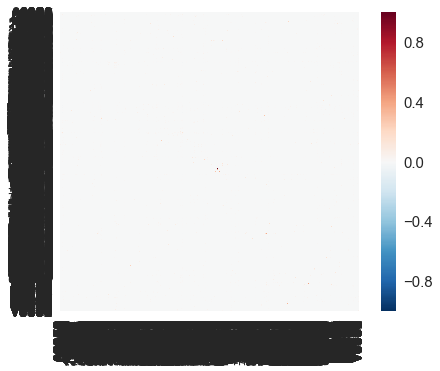

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(train_df.corr(), 
            cbar=True,
            annot=False,
            square=True,
            fmt='.2f')
plt.show()

In [33]:
from sklearn.cross_validation import train_test_split

X = train_df
y = targetSeries

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Decision Trees

In [69]:
#Decision Tree train model. Call up my model and name it clf
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [70]:
# make predictions
dt_expected = y_test
dt_predicted = clf_dt.predict(X_test)
print(clf_dt.score(X_test, y_test))

0.422791035601


In [71]:
# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(dt_expected, dt_predicted)))
print(metrics.classification_report(dt_expected, dt_predicted))

accuracy: 0.422791035601
             precision    recall  f1-score   support

     MDC-01       0.01      0.01      0.01        80
     MDC-02       0.00      0.00      0.00        19
     MDC-03       0.02      0.03      0.03       147
     MDC-04       0.60      0.58      0.59      2830
     MDC-05       0.64      0.65      0.65      4277
     MDC-06       0.26      0.27      0.26      1995
     MDC-07       0.06      0.07      0.06       492
     MDC-08       0.49      0.49      0.49      2305
     MDC-09       0.08      0.07      0.07       456
     MDC-10       0.12      0.12      0.12       696
     MDC-11       0.21      0.20      0.20       710
     MDC-12       0.14      0.15      0.15       568
     MDC-13       0.03      0.03      0.03       120
     MDC-14       0.12      0.14      0.13        28
     MDC-16       0.08      0.08      0.08       262
     MDC-17       0.03      0.02      0.02       154
     MDC-18       0.43      0.42      0.43       919
     MDC-19       0.

In [34]:
# Is this what we need to get better predictions for our news articles?
# First question:  How many components?

# Our original feature space was pretty big
print(train_df.shape)

from sklearn.decomposition import PCA, RandomizedPCA

# we want something that is smaller than 6916 
# let's start with 300 - that's about how big the second round space was
# maybe we've kept more info for the same number of features


pca = PCA(n_components=5)
X_pca = pca.fit_transform(train_df)

print( 'PCA Total Variance Explained: ' + str(sum(pca.explained_variance_ratio_)))

(59642, 6551)
PCA Total Variance Explained: 0.999999999252


In [35]:
#set up our test and training vectors with the PCA'd vector space
X = X_pca  #remember this is the output from the vectorizer and we are turning it into an array

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

#### Run the Decision Tree again with PCA features

In [74]:
#Decision Tree train model. Call up my model and name it clf
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(max_depth=5)
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [75]:
# make predictions
dt_expected = y_test
dt_predicted = clf_dt.predict(X_test)
print(clf_dt.score(X_test, y_test))

0.396579668027


In [76]:
# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(dt_expected, dt_predicted)))
print(metrics.classification_report(dt_expected, dt_predicted))

accuracy: 0.396579668027
             precision    recall  f1-score   support

     MDC-01       0.00      0.00      0.00        80
     MDC-02       0.00      0.00      0.00        19
     MDC-03       0.00      0.00      0.00       147
     MDC-04       0.68      0.50      0.57      2830
     MDC-05       0.43      0.83      0.56      4277
     MDC-06       0.00      0.00      0.00      1995
     MDC-07       0.00      0.00      0.00       492
     MDC-08       0.23      0.55      0.32      2305
     MDC-09       0.00      0.00      0.00       456
     MDC-10       0.00      0.00      0.00       696
     MDC-11       0.25      0.00      0.00       710
     MDC-12       0.00      0.00      0.00       568
     MDC-13       0.00      0.00      0.00       120
     MDC-14       0.00      0.00      0.00        28
     MDC-16       0.00      0.00      0.00       262
     MDC-17       0.00      0.00      0.00       154
     MDC-18       0.30      0.49      0.37       919
     MDC-19       0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Random Forest

In [204]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_features= 'auto', n_estimators=1000, oob_score = True)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [205]:
clf_rf_expected = y_test
clf_rf_predicted = clf_rf.predict(X_test)
print(clf_rf.score(X_test, y_test))
print(clf_rf.feature_importances_)

0.707874587828
[ 0.00109384  0.00108588  0.00753534  0.00120262  0.02489803  0.00507234
  0.00870074  0.00610083  0.01209594  0.00280241  0.00226106  0.00386853
  0.01214471  0.01447219  0.01238524  0.00808036  0.00365321  0.00524562
  0.01052649  0.0049301   0.00301861  0.00945099  0.00443235  0.00235509
  0.00288852  0.00267542  0.0033839   0.00407208  0.00936635  0.00249835
  0.00639495  0.00320268  0.00484351  0.00920244  0.00156597  0.00270005
  0.0021789   0.00263495  0.00517989  0.00310764  0.00356276  0.00601337
  0.0073993   0.0048846   0.00606379  0.00489029  0.00364047  0.00269226
  0.0047049   0.00291991  0.00291564  0.00310382  0.00242468  0.00212893
  0.00252887  0.00178715  0.00153764  0.00156799  0.00157568  0.00308418
  0.00187157  0.001905    0.00198156  0.00205861  0.0018693   0.00207713
  0.00207663  0.00340453  0.00233697  0.00430099  0.00223825  0.00403824
  0.00346569  0.00479752  0.00425745  0.00225272  0.00228897  0.00295889
  0.00200008  0.00286619  0.00213744

In [206]:
# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf_rf_expected, clf_rf_predicted)))
print(metrics.classification_report(clf_rf_expected, clf_rf_predicted))

accuracy: 0.707874587828
             precision    recall  f1-score   support

     MDC-01       1.00      0.01      0.02        80
     MDC-02       0.00      0.00      0.00        19
     MDC-03       0.95      0.14      0.24       147
     MDC-04       0.74      0.83      0.78      2830
     MDC-05       0.63      0.93      0.75      4277
     MDC-06       0.66      0.78      0.72      1995
     MDC-07       0.95      0.53      0.68       492
     MDC-08       0.81      0.85      0.83      2305
     MDC-09       0.78      0.47      0.59       456
     MDC-10       0.58      0.28      0.38       696
     MDC-11       0.45      0.23      0.31       710
     MDC-12       0.33      0.03      0.05       568
     MDC-13       0.96      0.66      0.78       120
     MDC-14       0.82      0.32      0.46        28
     MDC-16       0.68      0.11      0.20       262
     MDC-17       1.00      0.26      0.41       154
     MDC-18       0.77      0.73      0.75       919
     MDC-19       0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Naive Bayes
Variables are independent.

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

clf_nb = MultinomialNB(fit_prior = False)

clf_nb.fit(X_train, y_train)

ValueError: Input X must be non-negative

In [ ]:
clf_boost_expected = y_test
clf_boost_predicted = clf_nb.predict(X_test)
print(accuracy_score(clf_boost_expected, clf_boost_predicted))

In [ ]:
# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf_boost_expected, clf_boost_predicted)))
print(metrics.classification_report(clf_boost_expected, clf_boost_predicted))

In [ ]:
print(classification_report(clf_boost_expected, clf_boost_predicted))
print(confusion_matrix(clf_boost_expected, clf_boost_predicted))

### Multi-layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(20, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
clf_NN.fit(X_train, y_train)

In [ ]:
expected_NN = y_test
predicted_NN = clf_NN.predict(X_test)

In [ ]:
print("Accuracy", accuracy_score(expected_NN,predicted_NN))
print(classification_report(expected_NN, predicted_NN))
print(confusion_matrix(expected_NN, predicted_NN))

### Linear SVM

In [ ]:
from sklearn.svm import SVC
start_time = time.clock()
#standard linear SVC
clf_SVC = SVC(kernel='linear', C=0.01, gamma='auto')
clf_SVC.fit(X_train, y_train)
predicted_SVC=clf_SVC.predict(X_test)
print("Time to run", time.clock() - start_time, "seconds")

In [ ]:
# summarize the fit of the model
clf_SVC_expected = y_test
print(classification_report(clf_SVC_expected, predicted_SVC))
print(confusion_matrix(clf_SVC_expected, predicted_SVC))
print(accuracy_score(clf_SVC_expected, predicted_SVC))

In [ ]:
# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf_SVC_expected, predicted_SVC)))
print(metrics.classification_report(clf_SVC_expected, predicted_SVC))